In [73]:
import torch
from torch import nn 
import pandas as pd 
import numpy as np 
import torchvision 
from torchvision import transforms, datasets, models
from torch.utils.data import dataloader
import os
import requests
import zipfile
from pathlib import Path

In [23]:
birds_cv = pd.read_csv("birds_dataset/birds.csv")
birds_cv.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [24]:
# Becoming one with the data
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [25]:
image_path = Path('birds_dataset')
walk_through_dir(image_path)

There are 3 directories and 2 images in 'birds_dataset'.
There are 525 directories and 0 images in 'birds_dataset/train'.
There are 0 directories and 164 images in 'birds_dataset/train/WHITE THROATED BEE EATER'.
There are 0 directories and 136 images in 'birds_dataset/train/BARRED PUFFBIRD'.
There are 0 directories and 179 images in 'birds_dataset/train/ABYSSINIAN GROUND HORNBILL'.
There are 0 directories and 139 images in 'birds_dataset/train/AMERICAN REDSTART'.
There are 0 directories and 138 images in 'birds_dataset/train/LILAC ROLLER'.
There are 0 directories and 158 images in 'birds_dataset/train/GOLDEN EAGLE'.
There are 0 directories and 155 images in 'birds_dataset/train/PARAKETT  AUKLET'.
There are 0 directories and 153 images in 'birds_dataset/train/SAMATRAN THRUSH'.
There are 0 directories and 164 images in 'birds_dataset/train/GRAY KINGBIRD'.
There are 0 directories and 207 images in 'birds_dataset/train/OYSTER CATCHER'.
There are 0 directories and 155 images in 'birds_datas

In [26]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('birds_dataset/train'), PosixPath('birds_dataset/test'))

Random image path: birds_dataset/train/EURASIAN BULLFINCH/088.jpg
Image class: EURASIAN BULLFINCH
Image height: 224
Image width: 224


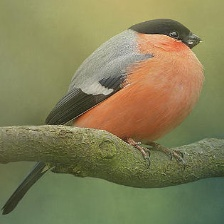

In [27]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem # parent is for example `data/pizza_steak_sushi/train/pizza` that stem is final part of that wich is pizza

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

The image shape is: (224, 224, 3)


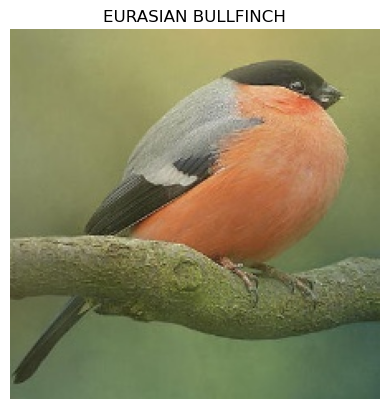

In [28]:
import numpy as np
import matplotlib.pyplot as plt

image_as_array = np.asarray(img)

image_shape = image_as_array.shape
plt.imshow(image_as_array)
print(f"The image shape is: {image_shape}")
plt.title(f"{image_class}")
plt.axis('off');

In [34]:
# transforming data

data_transform = transforms.Compose([
    # Resize our images to 64*64
    transforms.Resize(size=(64, 64)),
    # transforms.TrivialAugmentWide(num_magnitude_bins=31),
    # Flip the images randomly to Horizontal
    transforms.RandomHorizontalFlip(p=0.5), # in khat baraye ma ahamiyate chandani dar amalkarde model nadarad faghat yek no transform ast ke gharar dadim ta manaye transforms ra bishtar dard konim
    # Convert PIL images or Numpy.darray to Tensor
    transforms.ToTensor()
])
test_data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

Other forms of transforms

In [70]:
# from torchvision import transforms

# train_transform = transforms.Compose([
#     transforms.Resize(size=(224, 224)),
#     transforms.TrivialAugmentWide(num_magnitude_bins=31), #num_magnitude_bins Meghdar taghirati ke rooye ax anjam mishavd ra tayin mikonad.
#     # transforms.GaussianBlur(kernel_size=(1, 3), sigma=(0.1, 5)),
#     # transforms.RandomRotation(degrees=(0, 180)),
#     # transforms.RandomCrop(size=(212, 212)),
#     # transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
#     # transforms.ColorJitter(brightness=.5, hue=.3),
#     transforms.ToTensor(),
# ])

# test_transform = transforms.Compose([
#     transforms.Resize(size=(224, 224)),
#     transforms.ToTensor()
# ])

In [35]:
test_image = data_transform(img) # Hamchenin transforms.Compose() abaade tasavir ra az (H, W, CCH) -> (CCH, H, W) Tabdil mikonad ke baraye pytorch monaseb ast
test_image, test_image.shape

(tensor([[[0.5608, 0.5647, 0.5647,  ..., 0.6392, 0.6353, 0.6314],
          [0.5608, 0.5608, 0.5608,  ..., 0.6353, 0.6314, 0.6275],
          [0.5569, 0.5569, 0.5608,  ..., 0.6314, 0.6314, 0.6275],
          ...,
          [0.3569, 0.3216, 0.3647,  ..., 0.2902, 0.2784, 0.2627],
          [0.3765, 0.3765, 0.3765,  ..., 0.2863, 0.2745, 0.2627],
          [0.3843, 0.3804, 0.3725,  ..., 0.2745, 0.2667, 0.2549]],
 
         [[0.5765, 0.5765, 0.5765,  ..., 0.6392, 0.6353, 0.6314],
          [0.5765, 0.5725, 0.5725,  ..., 0.6353, 0.6314, 0.6235],
          [0.5725, 0.5725, 0.5725,  ..., 0.6275, 0.6275, 0.6235],
          ...,
          [0.4118, 0.3725, 0.4196,  ..., 0.4039, 0.3922, 0.3765],
          [0.4510, 0.4549, 0.4510,  ..., 0.4000, 0.3882, 0.3725],
          [0.4510, 0.4588, 0.4588,  ..., 0.3882, 0.3804, 0.3647]],
 
         [[0.3804, 0.3922, 0.4000,  ..., 0.4039, 0.4039, 0.4000],
          [0.3804, 0.3882, 0.3961,  ..., 0.4078, 0.4039, 0.4000],
          [0.3765, 0.3843, 0.3882,  ...,

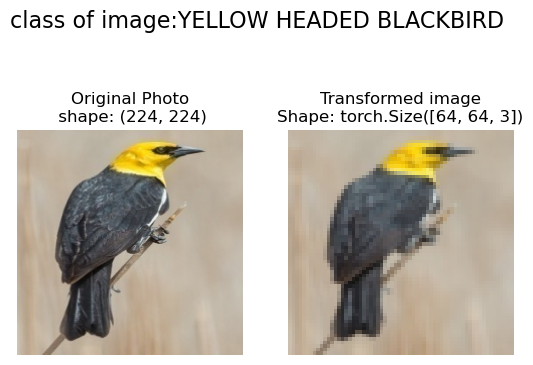

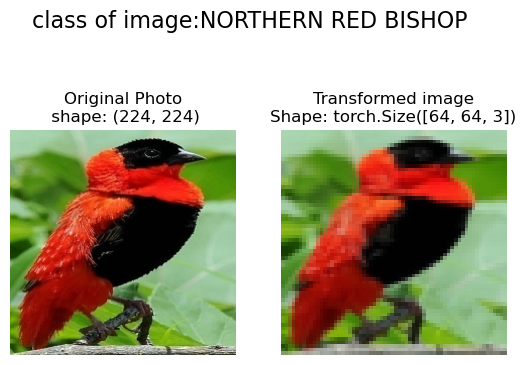

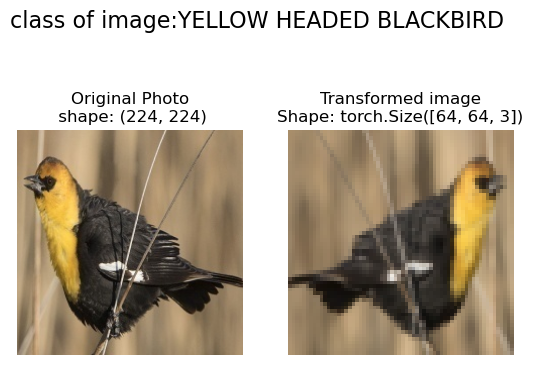

In [36]:
def plot_transformed_images(image_paths: list, transform: transforms.Compose,n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    torch.manual_seed(seed)
  random_paths = random.sample(image_paths, k=n)
  for image_path in random_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original Photo\n shape: {f.size}")
      ax[0].axis('off')

      #Transform our target image
      transformed_image = transform(f).permute(1, 2, 0)  # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed image\nShape: {transformed_image.shape}")
      ax[1].axis('off')

      fig.suptitle(f"class of image:{image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, data_transform, n=3, seed=42)

4. Option 1: Loading image data using ImageFolder

In [37]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=test_data_transform
                                 )
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 84635
     Root location: birds_dataset/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 2625
     Root location: birds_dataset/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [39]:
# classes in train data 
train_data.class_to_idx

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN DIPPER': 17,
 'AMERICAN FLAMINGO': 18,
 'AMERICAN GOLDFINCH': 19,
 'AMERICAN KESTREL': 20,
 'AMERICAN PIPIT': 21,
 'AMERICAN REDSTART': 22,
 'AMERICAN ROBIN': 23,
 'AMERICAN WIGEON': 24,
 'AMETHYST WOODSTAR': 25,
 'ANDEAN GOOSE': 26,
 'ANDEAN LAPWING': 27,
 'ANDEAN SISKIN': 28,
 'ANHINGA': 29,
 'ANIANIAU': 30,
 'ANNAS HUMMINGBIRD': 31,
 'ANTBIRD': 32,
 'ANTILLEAN EUPHONIA': 33,
 'APAPANE': 34,
 'APOSTLEBIRD': 35,
 'ARARIPE MANAKIN': 36,
 'ASHY STORM PETREL': 37,
 'ASHY THRUSHBIRD': 38,
 'ASIAN CRESTED IBIS': 39,
 'ASIAN DOLLARD BIRD': 40,
 'AS

In [41]:
class_names = train_data.classes
class_names[:20]

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN DIPPER',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH']

(224, 224, 3)

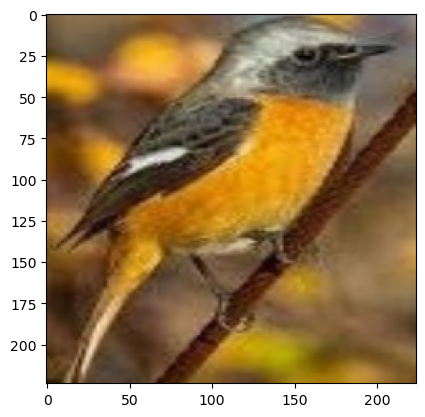

In [51]:
random.seed(42)
random_image_path = random.choice(image_path_list)
img = Image.open(random_image_path)
plt.imshow(img)
img_to_np = np.asarray(img)
img_to_np.shape

In [44]:
img, label = train_data[224]
print(f"The image tensor like:\n{img}")
print(f"The size of transformed image is {img.shape}")
print(f"the type of img is {type(img)}")
print(f"The label of image is: {label}")
print(f"the type of image label is {type(label)}")

The image tensor like:
tensor([[[0.1216, 0.1098, 0.1647,  ..., 0.0941, 0.1451, 0.0941],
         [0.1255, 0.1137, 0.1608,  ..., 0.0549, 0.0784, 0.0784],
         [0.1176, 0.1137, 0.1529,  ..., 0.0667, 0.0706, 0.0824],
         ...,
         [0.3882, 0.3686, 0.4118,  ..., 0.2392, 0.1922, 0.1412],
         [0.3882, 0.3725, 0.3922,  ..., 0.1804, 0.1569, 0.1765],
         [0.3765, 0.3608, 0.3490,  ..., 0.1843, 0.1961, 0.1922]],

        [[0.1333, 0.1216, 0.1804,  ..., 0.1059, 0.1608, 0.1059],
         [0.1333, 0.1294, 0.1804,  ..., 0.0510, 0.0784, 0.0784],
         [0.1216, 0.1294, 0.1725,  ..., 0.0471, 0.0588, 0.0706],
         ...,
         [0.3725, 0.3529, 0.3961,  ..., 0.2353, 0.1882, 0.1373],
         [0.3725, 0.3569, 0.3765,  ..., 0.1765, 0.1529, 0.1725],
         [0.3608, 0.3451, 0.3333,  ..., 0.1804, 0.1922, 0.1882]],

        [[0.0627, 0.0314, 0.0784,  ..., 0.0431, 0.0902, 0.0392],
         [0.0745, 0.0392, 0.0706,  ..., 0.0196, 0.0431, 0.0471],
         [0.0627, 0.0392, 0.0549,  

In [45]:
len(train_data),  len(test_data)

(84635, 2625)

The shape of image before permute is: torch.Size([3, 64, 64])
The shape of image after permute is: torch.Size([64, 64, 3])


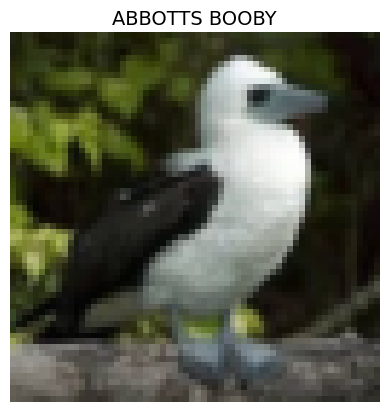

In [48]:
# Rearrange the order of dimentions
permute_image = img.permute(1, 2, 0)
print(f"The shape of image before permute is: {img.shape}")
print(f"The shape of image after permute is: {permute_image.shape}")

#PLot the image
# plt.figure(figsize=(7, 7))
plt.imshow(permute_image)
plt.title(class_names[label], fontsize=14)
plt.axis('off');

4.1 Turn loaded images into DataLoader's


A DataLoader is going to help us turn our Dataset's into iterables and we can customise the batch_size so our model can see batch_size images at a time.

In [52]:
import os
os.cpu_count()

4

In [92]:
from torch.utils.data import DataLoader
BATCH_SIZE = 128

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(), #tedad core haye cpu ke estefade mishavad
                              shuffle=True,
                              )
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f62386a7410>,
 <torch.utils.data.dataloader.DataLoader at 0x7f62386a5350>)

In [93]:
len(train_dataloader), len(test_dataloader)

(662, 21)

In [94]:
# f_batch_train = next(iter(test_dataloader))
# f_batch_train

In [95]:
# first_batch_images, first_batch_labels = f_batch_train
# first_batch_images.shape, first_batch_labels.shape

#### download some useful functions from a url 

In [96]:
# masalan dl kardan accuracy_fn
import requests
from pathlib import Path

# download helper functions from learn Pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [97]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### create our model architect

In [98]:
from torch.nn.modules.pooling import MaxPool1d
class TinyVGG(nn.Module):
  def __init__(self, in_channels, hidden_units, out_features= len(class_names)):
    super().__init__()


    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=hidden_units, kernel_size=3, stride=(1, 1), padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=(1, 1), padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2, 2))
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=(1, 1), padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=(1, 1), padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2, 2))
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units *16*16 , out_features=len(class_names))
    )


  def forward(self, x):
    x = self.conv_block1(x)
    # print(x.shape)
    x = self.conv_block2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [99]:
model = TinyVGG(in_channels=3, hidden_units=8, out_features=len(class_names)).to(device)

In [100]:
from torchinfo import summary

summary(model, input_size=(64, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [64, 525]                 --
├─Sequential: 1-1                        [64, 8, 32, 32]           --
│    └─Conv2d: 2-1                       [64, 8, 64, 64]           224
│    └─ReLU: 2-2                         [64, 8, 64, 64]           --
│    └─Conv2d: 2-3                       [64, 8, 64, 64]           584
│    └─ReLU: 2-4                         [64, 8, 64, 64]           --
│    └─MaxPool2d: 2-5                    [64, 8, 32, 32]           --
├─Sequential: 1-2                        [64, 8, 16, 16]           --
│    └─Conv2d: 2-6                       [64, 8, 32, 32]           584
│    └─ReLU: 2-7                         [64, 8, 32, 32]           --
│    └─Conv2d: 2-8                       [64, 8, 32, 32]           584
│    └─ReLU: 2-9                         [64, 8, 32, 32]           --
│    └─MaxPool2d: 2-10                   [64, 8, 16, 16]           --
├─Sequentia

In [101]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [102]:
tr_loss = []
te_loss = []

#### 6.Create train_step

In [103]:
from tqdm.auto import tqdm

def train_step(model: torch.nn,
               dataloader: DataLoader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               device=device):

  loss_train, acc_train = 0, 0

  for batch, (X_train, y_train) in enumerate(dataloader):

    X_train, y_train = X_train.to(device), y_train.to(device)

    X_logits = model(X_train)

    X_preds = torch.softmax(X_logits, dim=1).argmax(dim=1)

    loss = loss_fn(X_logits, y_train)
    loss_train += loss
    acc_train += accuracy_fn(y_train, X_preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  loss_train /= len(train_dataloader)
  acc_train /= len(train_dataloader)
  return loss_train, acc_train

### create test step

In [104]:
def test_step(model: torch.nn,
              dataloader: torch.utils.data.DataLoader,
              loss_fn= nn.CrossEntropyLoss(),
              accuracy_fn=accuracy_fn,
              device=device):

  test_loss, acc_test = 0, 0

  with torch.no_grad():
    for X_test, y_test in dataloader:

      X_test, y_test = X_test.to(device), y_test.to(device)

      y_logits = model(X_test)

      y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
      loss = loss_fn(y_logits, y_test)
      test_loss += loss
      acc_test += accuracy_fn(y_test, y_preds)

  test_loss /= len(test_dataloader)
  acc_test /= len(test_dataloader)
  return test_loss, acc_test

7.6 Creating a train() function to combine train_step() and test_step()

In [105]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss.item())
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss.item())
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

### train model

In [106]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 3

# Recreate an instance of TinyVGG
model_0 = TinyVGG(in_channels=3, # number of color channels of our target images
                  hidden_units=10,
                  out_features=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]